In [9]:
# Decision Tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X, y = wine.data[:, :2], wine.target    # only take the first two features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

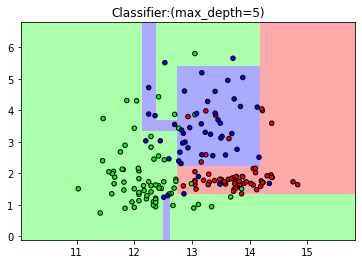

In [12]:
# draw result plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier:(max_depth=5)')
plt.show()

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

wine = datasets.load_wine()
X, y = wine.data[:, :2], wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

forest = RandomForestClassifier(n_estimators=6, random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

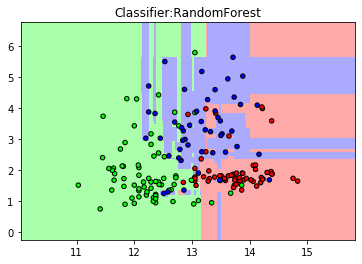

In [16]:
# plot result
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier:RandomForest')
plt.show()

In [23]:
# Random Forest in Practice
#import os
#os.getcwd()
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('adult.csv', header=None, index_col=False, names=['age', 'employer', 'weight', 'education', 'edu_years',
                                                                    'marriage', 'job', 'family', 'race', 'gender', 'assets',
                                                                    'loss', 'wh_per_week', 'country', 'salary'])
data_lite = data[['age', 'employer', 'education', 'gender', 'wh_per_week', 'job', 'salary']]
display(data_lite.head())

# transform variables using get_dummies
data_dummies = pd.get_dummies(data_lite)
print(list(data_dummies.columns))
data_dummies.head(5)

,age,employer,education,gender,wh_per_week,job,salary
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


['age', 'wh_per_week', 'employer_ ?', 'employer_ Federal-gov', 'employer_ Local-gov', 'employer_ Never-worked', 'employer_ Private', 'employer_ Self-emp-inc', 'employer_ Self-emp-not-inc', 'employer_ State-gov', 'employer_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'job_ ?', 'job_ Adm-clerical', 'job_ Armed-Forces', 'job_ Craft-repair', 'job_ Exec-managerial', 'job_ Farming-fishing', 'job_ Handlers-cleaners', 'job_ Machine-op-inspct', 'job_ Other-service', 'job_ Priv-house-serv', 'job_ Prof-specialty', 'job_ Protective-serv', 'job_ Sales', 'job_ Tech-support', 'job_ Transport-moving', 'salary_ <=50K', 'salary_ >50K']


,age,wh_per_week,employer_ ?,employer_ Federal-gov,employer_ Local-gov,employer_ Never-worked,employer_ Private,employer_ Self-emp-inc,employer_ Self-emp-not-inc,employer_ State-gov,...,job_ Machine-op-inspct,job_ Other-service,job_ Priv-house-serv,job_ Prof-specialty,job_ Protective-serv,job_ Sales,job_ Tech-support,job_ Transport-moving,salary_ <=50K,salary_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# set features and target
features = data_dummies.loc[:, 'age':'job_ Transport-moving']
X = features.values
y = data_dummies['salary_ >50K'].values

# fit decision tree model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
forest = RandomForestClassifier(n_estimators=6, random_state=3)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

dtree = tree.DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)
print(dtree.score(X_test, y_test))

0.7849158580027024
0.7962166809974205


In [33]:
new_sample = [[37,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]
res1 = forest.predict(new_sample)
res2 = dtree.predict(new_sample)

if res2:
    print('Salary > 50k')
else:
    print('Salary < 50k')

Salary < 50k
